In [155]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as sts
import math
from scipy.stats import probplot, expon
from scipy.stats import norm, expon, lognorm, weibull_min
from scipy.stats import normaltest
import csv



In [156]:


pdv = pd.read_csv('C:\\Users\\ddavi\\Downloads\\arquivocsv\\placadeVideo.csv', encoding='latin-1')


In [157]:


# Remover o caractere "Â" das colunas 'nome' e 'preço pix'
pdv['preÃ§o pix'] = pdv['preÃ§o pix'].str.replace("R$Â", "")

pdv['preco a prazo'] = pdv['preco a prazo'].str.replace("R$Â", "")

print(pdv)


                                                  nome  preÃ§o pix  \
0    Placa de VÃ­deo RTX 3060 Asus Dual O12G V2 NVI...    2.199,99   
1    Placa de VÃ­deo RX 6600 CLD 8G ASRock AMD Rade...    1.449,99   
2    Placa de VÃ­deo RX 6750 XT Mech 2X 12G OC MSI ...    2.559,99   
3    Placa de VÃ­deo RTX 3060 Ti 1-Click OC Galax N...    2.399,99   
4    Placa de VÃ­deo RTX 3060 Twin Edge OC Zotac Ga...    2.279,99   
..                                                 ...         ...   
515  Placa De Video 4gb R7 240 Ddr5 128bits Vga/hdm...      568,00   
516  Bloco VGA Barrow Para Rtx 3080 (ti) E Rtx 3090...    1.199,00   
517  Placa de VÃ­deo Asus NVIDIA GeForce Dual RTX30...   15.075,01   
518  Placa de VÃ­deo MSI NVIDIA GeForce Gaming X RT...    2.694,11   
519  Placa de VÃ­deo PCYes NVIDIA GeForce GTX 1050 ...    1.399,80   

    preco a prazo preÃ§o original  \
0        2.444,43    R$Â 2.743,32   
1        1.705,87    R$Â 2.223,52   
2        2.844,43    R$Â 3.222,21   
3        2.

In [158]:

pdv['preco a prazo'] = pdv['preco a prazo'].astype(str)
pdv['preco a prazo'] =pdv['preco a prazo'].replace('\xa0', '', regex=True).apply(lambda x: re.sub(r'\.(?=\d)', '', x)).replace(',', '.', regex=True)
pdv['preco a prazo'] = pdv['preco a prazo'].astype(float)

# Remover linhas com valores nulos na coluna 'preco a prazo'
pdv.dropna(subset=['preco a prazo'], inplace=True)


In [159]:
pdv['preÃ§o pix'] = pdv['preÃ§o pix'].astype(str)
pdv['preÃ§o pix'] =pdv['preÃ§o pix'].replace('\xa0', '', regex=True).apply(lambda x: re.sub(r'\.(?=\d)', '', x)).replace(',', '.', regex=True)
pdv['preÃ§o pix'] = pdv['preÃ§o pix'].astype(float)
# Remover linhas com valores nulos na coluna 'preÃ§o pix'
pdv.dropna(subset=['preÃ§o pix'], inplace=True)

In [160]:
pdv['preÃ§o pix'] = pdv['preÃ§o pix'].apply(lambda x: math.floor(x))
pdv['preco a prazo'] = pdv['preco a prazo'].apply(lambda x: math.floor(x))
print(pdv)

                                                  nome  preÃ§o pix  \
0    Placa de VÃ­deo RTX 3060 Asus Dual O12G V2 NVI...        2199   
1    Placa de VÃ­deo RX 6600 CLD 8G ASRock AMD Rade...        1449   
2    Placa de VÃ­deo RX 6750 XT Mech 2X 12G OC MSI ...        2559   
3    Placa de VÃ­deo RTX 3060 Ti 1-Click OC Galax N...        2399   
4    Placa de VÃ­deo RTX 3060 Twin Edge OC Zotac Ga...        2279   
..                                                 ...         ...   
508  Placa de VÃ­deo Afox NVIDIA GeForce GT730, 4GB...         428   
511  Placa de VÃ­deo Afox NVIDIA GeForce GT420, 2GB...         561   
515  Placa De Video 4gb R7 240 Ddr5 128bits Vga/hdm...         568   
517  Placa de VÃ­deo Asus NVIDIA GeForce Dual RTX30...       15075   
518  Placa de VÃ­deo MSI NVIDIA GeForce Gaming X RT...        2694   

     preco a prazo preÃ§o original  \
0             2444    R$Â 2.743,32   
1             1705    R$Â 2.223,52   
2             2844    R$Â 3.222,21   
3      

### **Medidas de Tendência Central**

In [161]:
pdv_cleaned = pdv.dropna(subset=['preÃ§o pix'])

media = pdv["preÃ§o pix"].mean()
mediana = pdv["preÃ§o pix"].median()
moda = pdv["preÃ§o pix"].mode()[0]

pdv_cleaned_parc = pdv.dropna(subset=['preco a prazo'])

mediaParc = pdv["preco a prazo"].mean()
medianaParc = pdv["preco a prazo"].median()
modaParc = pdv["preco a prazo"].mode()[2]


print("media no pix:", media,"\n" "mediana no pix:", mediana,"\n" "moda no pix:", moda)
print( "media a prazo:", mediaParc,"\n" "mediana a prazo:", medianaParc,"\n" "moda a prazo:", modaParc)

media no pix: 3688.32722513089 
mediana no pix: 2312.0 
moda no pix: 2399
media a prazo: 4164.908376963351 
mediana a prazo: 2610.0 
moda a prazo: 3555


### **Variancia**

In [162]:
varianciaPix = np.var(pdv["preÃ§o pix"])
varianciaPrazo = np.var(pdv["preco a prazo"])
print("Variançia pix", varianciaPix, "\n" "variancia parcelado:", varianciaPrazo)


Variançia pix 14163496.597112196 
variancia parcelado: 17841137.02040103


### **Desvio Padrão**

In [163]:
desvioPadraoPix = pdv["preÃ§o pix"].std()
desvioPadraoPrazo = pdv["preco a prazo"].std()
print("desvio padrão Pix:", desvioPadraoPix, "\n" "Desvio padrão prazo", desvioPadraoPrazo)

desvio padrão Pix: 3768.377784785271 
Desvio padrão prazo 4229.416526152062


### **Desvio Medio**

In [164]:
desvioMdPix = pdv["preÃ§o pix"]
dmPix = np.abs(desvioMdPix - desvioMdPix.mean()).mean() #calcular manualmente
desvioMdPrazo = pdv["preco a prazo"]
dmPrazo = np.abs(desvioMdPrazo - desvioMdPrazo.mean()).mean() #calcular manualmente

print("Desvio Medio Pix:", dmPix)
print( "Desvio Medio Prazo:", dmPrazo)

Desvio Medio Pix: 2945.285038787313
Desvio Medio Prazo: 3313.0100052081907


### **Tabela de Frequência**

In [165]:
frequenciapix = pdv['preÃ§o pix'].value_counts().reset_index()
frequenciapix.columns = ['preÃ§o pix', 'Frequência']

# Imprimir a tabela de frequência
print(frequenciapix)

     preÃ§o pix  Frequência
0          2399           4
1          3399           4
2           544           3
3           179           3
4          3199           3
..          ...         ...
339        2209           1
340        7184           1
341        2499           1
342         659           1
343        2694           1

[344 rows x 2 columns]


In [166]:
frequenciaprazo = pdv['preco a prazo'].value_counts().reset_index()
frequenciaprazo.columns = ['preco a prazo', 'Frequência']

# Imprimir a tabela de frequência
print(frequenciaprazo)

     preco a prazo  Frequência
0             3999           3
1              265           3
2              299           3
3             3555           3
4              605           2
..             ...         ...
342           1332           1
343           4222           1
344          11764           1
345           3164           1
346          16750           1

[347 rows x 2 columns]


### **Histogramas**

<Figure size 500x350 with 0 Axes>

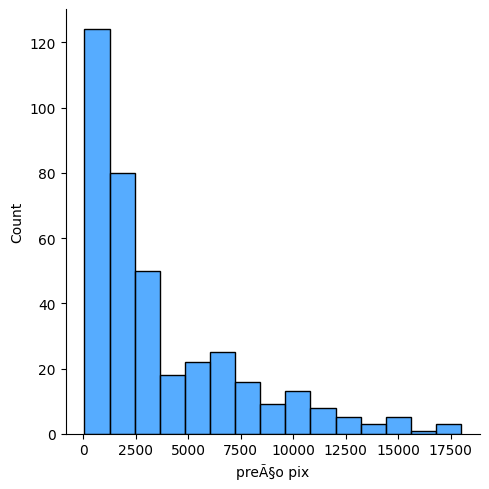

In [179]:
plt.figure(figsize=(10,7), dpi=50)
sns.displot(pdv['preÃ§o pix'],color="dodgerblue", label="compact",)
plt.savefig('histogramapix.png')
plt.show()

<Figure size 500x350 with 0 Axes>

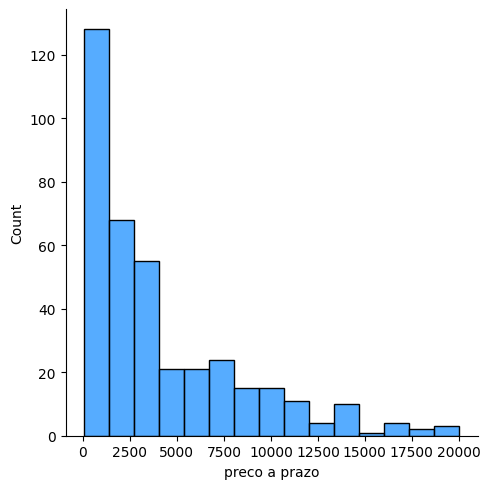

In [180]:
plt.figure(figsize=(10,7), dpi=50)
sns.displot(pdv['preco a prazo'],color="dodgerblue", label="compact",)
plt.savefig('histogramaprazo.png')
plt.show()


### **Boxplot**

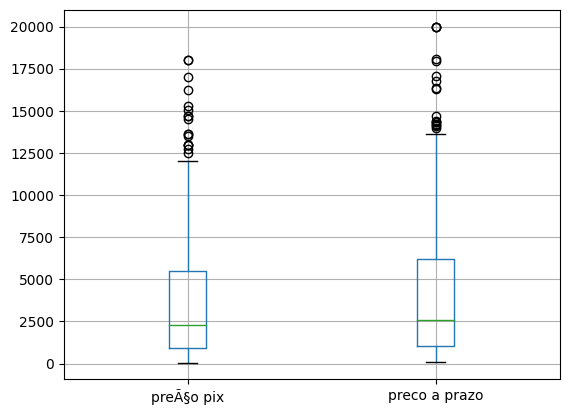

In [181]:

pdv.boxplot(column=['preÃ§o pix','preco a prazo'])
plt.savefig('boxplot.png')
plt.show()

### **Q-Q Plot**

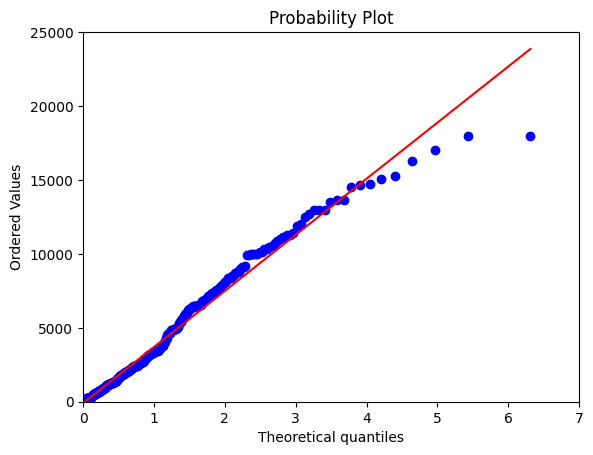

In [182]:

fig, ax = plt.subplots()
qqplot = probplot(pdv['preÃ§o pix'], dist=expon, plot=ax, fit=True)
ax.set_xlim(0, 7)
ax.set_ylim(0, 25000)
plt.savefig('qqplot_pix.png')
plt.show()

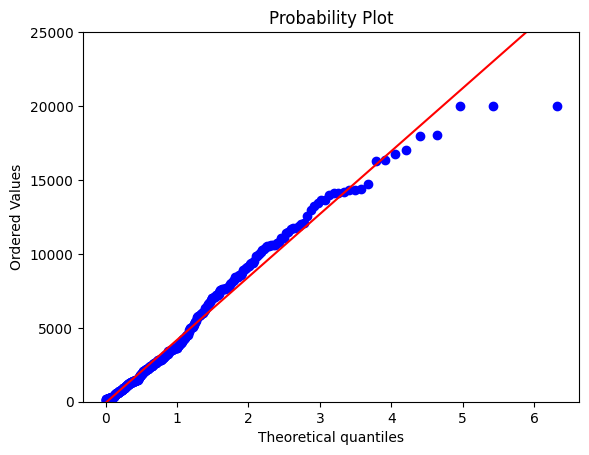

In [183]:

fig, ax = plt.subplots()
qqplot = probplot(pdv['preco a prazo'], dist=expon, plot=ax, fit=True)
ax.set_ylim(0, 25000)
plt.savefig('qqplot_prazo.png')
plt.show()

### **correlação**

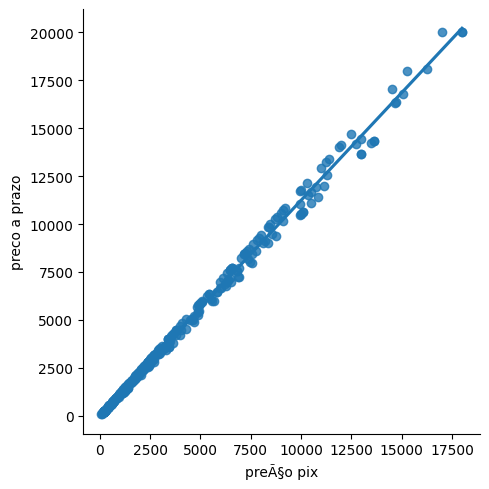

In [184]:
#sns.scatterplot(x='preÃ§o pix', y='preco a prazo', data=pdv)
sns.lmplot(x='preÃ§o pix', y='preco a prazo', data=pdv, ci=None)
plt.savefig('grafico_correlacao.png')
plt.show()

### **Teste de Normalidade**

In [173]:

k2, p = normaltest(pdv['preÃ§o pix'])
#hipotese nula: Os dados seguem distribuição normal
#hipotese alternativa: os dados não seguem distribuiçao normal
if p > 0.05:
    resultado_teste_normalidade_pix = "com 95% de confiança, os dados são similares a uma distriibuição normal"
else:
    resultado_teste_normalidade_pix = "com 95% de confiança, os dados NÃO!! são similares"

print(resultado_teste_normalidade_pix)

com 95% de confiança, os dados NÃO!! são similares


In [174]:

k2, p = normaltest(pdv['preco a prazo'])
#hipotese nula: Os dados seguem distribuição normal
#hipotese alternativa: os dados não seguem distribuiçao normal
if p > 0.05:
    teste_normalidade_prazo ="com 95% de confiança, os dados são similares a uma distriibuição normal"
else:
    teste_normalidade_prazo ="com 95% de confiança, os dados NÃO!! são similares"
     
print(teste_normalidade_prazo)

com 95% de confiança, os dados NÃO!! são similares


### **Best Fit Distribution**

In [175]:

valores_precopix = pdv['preÃ§o pix'].values
valores_prazo = pdv['preco a prazo'].values

def encontrar_melhor_distribuicao(dados, distribuicoes):
    melhor_distribuicao = None
    melhor_parametros = None
    melhor_erro = float('inf')

    for distribuicao in distribuicoes:
        parametros = distribuicao.fit(dados)
        pdf = distribuicao.pdf(dados, *parametros)
        erro = ((dados - pdf) ** 2).mean()

        if erro < melhor_erro:
            melhor_distribuicao = distribuicao
            melhor_parametros = parametros
            melhor_erro = erro

    return melhor_distribuicao, melhor_parametros

distribuicoes = [norm, expon, lognorm, weibull_min]

# Encontrar a melhor distribuição para cada coluna
melhor_distribuicao_pix, melhor_parametros_pix = encontrar_melhor_distribuicao(valores_precopix, distribuicoes)
melhor_distribuicao_prazo, melhor_parametros_prazo = encontrar_melhor_distribuicao(valores_prazo, distribuicoes)

# Imprimir as melhores distribuições encontradas para cada coluna
print('Melhor distribuição para a coluna 1:', melhor_distribuicao_pix.name)
print('Parâmetros:', melhor_parametros_pix)
print('Melhor distribuição para a coluna 2:', melhor_distribuicao_prazo.name)
print('Parâmetros:', melhor_parametros_prazo)

Melhor distribuição para a coluna 1: expon
Parâmetros: (63.0, 3625.32722513089)
Melhor distribuição para a coluna 2: expon
Parâmetros: (75.0, 4089.9083769633507)


### **Salvar dados em um csv**

In [176]:
import csv
lista_aed=[]
resultados = {
    'media pix': [media],
    'mediana pix': [mediana],
    'moda pix': [moda],
    'media prazo': [mediaParc],
    'mediana prazo': [medianaParc],
    'moda prazo': [modaParc],
    'variancia pix': [varianciaPix],
    'variancia prazo': [varianciaPrazo],
    'desvio Padrao Pix': [desvioPadraoPix],
    'desvio Padrao Prazo' : [desvioPadraoPrazo],
    'desvio medio Pix':[dmPix],
    'desvio medio Prazo':[dmPrazo],
    'teste normalidade pix':[resultado_teste_normalidade_pix],
    'teste normalidade prazo':[teste_normalidade_prazo],
    'Melhor Distribuição': [melhor_distribuicao_pix.name, melhor_distribuicao_prazo.name],
    'Parâmetros': [melhor_parametros_pix, melhor_parametros_prazo]
}

lista_aed.append(resultados)

# Salvar o DataFrame em um arquivo CSV
with open('aed.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.DictWriter(file, fieldnames=['media pix', 'mediana pix', 'moda pix', 'media prazo','mediana prazo','moda prazo','variancia pix','variancia prazo','desvio Padrao Pix','desvio Padrao Prazo' ,'desvio medio Pix', 'desvio medio Prazo','teste normalidade pix','teste normalidade prazo','Melhor Distribuição','Parâmetros'])
    writer.writeheader()
    writer.writerows(lista_aed)

In [177]:
df = pd.DataFrame(lista_aed)

In [178]:
df

,media pix,mediana pix,moda pix,media prazo,mediana prazo,moda prazo,variancia pix,variancia prazo,desvio Padrao Pix,desvio Padrao Prazo,desvio medio Pix,desvio medio Prazo,teste normalidade pix,teste normalidade prazo,Melhor Distribuição,Parâmetros
0,[3688.32722513089],[2312.0],[2399],[4164.908376963351],[2610.0],[3555],[14163496.597112196],[17841137.02040103],[3768.377784785271],[4229.416526152062],[2945.285038787313],[3313.0100052081907],"[com 95% de confiança, os dados NÃO!! são simi...","[com 95% de confiança, os dados NÃO!! são simi...","[expon, expon]","[(63.0, 3625.32722513089), (75.0, 4089.9083769..."
